## Importing Required Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import resample

## Defining Paths

In [2]:
# Define paths
train_path = 'food_quality/fruits-360_dataset_100x100/fruits-360/Training'
test_path = 'food_quality/fruits-360_dataset_100x100/fruits-360/Test'

## Helper Functions

In [3]:
def get_image_counts(path):
    """Count images in each category."""
    counts = {}
    for fruit in os.listdir(path):
        fruit_path = os.path.join(path, fruit)
        if os.path.isdir(fruit_path):
            counts[fruit] = len(os.listdir(fruit_path))
    return counts

In [4]:
def plot_distribution(counts, title):
    """Plot distribution of images across categories."""
    plt.figure(figsize=(15, 8))
    plt.bar(counts.keys(), counts.values())
    plt.title(title)
    plt.xlabel('Fruit Category')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [5]:
def apply_noise_reduction(image):
    """Apply Gaussian blur for noise reduction."""
    return cv2.GaussianBlur(image, (5, 5), 0)

In [6]:
def balance_dataset(path, target_count):
    """Balance the dataset through oversampling or undersampling."""
    for fruit in os.listdir(path):
        fruit_path = os.path.join(path, fruit)
        if os.path.isdir(fruit_path):
            images = os.listdir(fruit_path)
            if len(images) < target_count:
                # Oversample
                oversampled = resample(images, 
                                       replace=True, 
                                       n_samples=target_count, 
                                       random_state=42)
                for i, img_name in enumerate(oversampled[len(images):]):
                    img = cv2.imread(os.path.join(fruit_path, img_name))
                    cv2.imwrite(os.path.join(fruit_path, f'oversampled_{i}.jpg'), img)
            elif len(images) > target_count:
                # Undersample
                undersampled = resample(images, 
                                        replace=False, 
                                        n_samples=target_count, 
                                        random_state=42)
                for img_name in images:
                    if img_name not in undersampled:
                        os.remove(os.path.join(fruit_path, img_name))

## Analyze Class Distribution

In [7]:
# Analyze Class Distribution
train_counts = get_image_counts(train_path)
test_counts = get_image_counts(test_path)

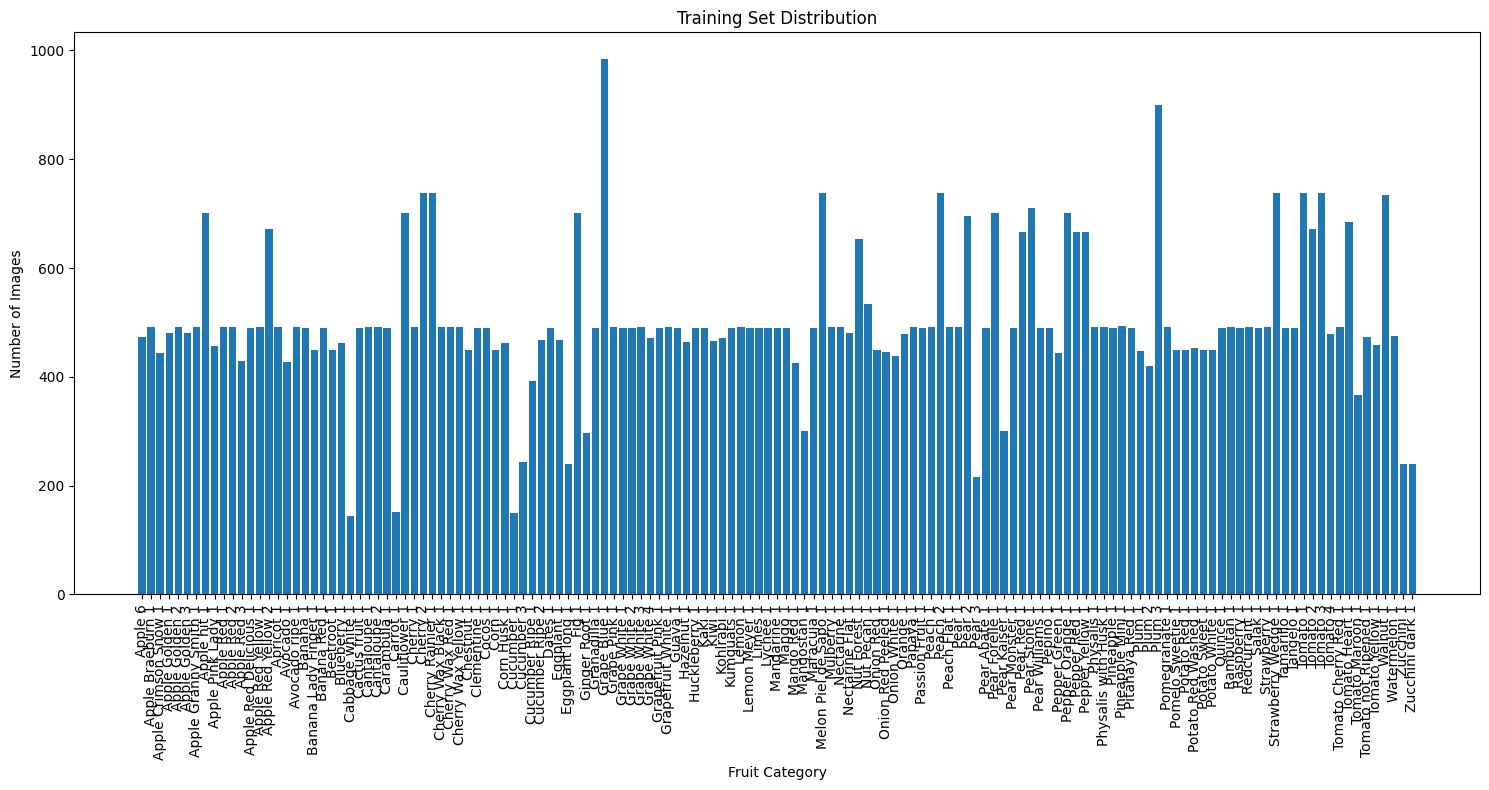

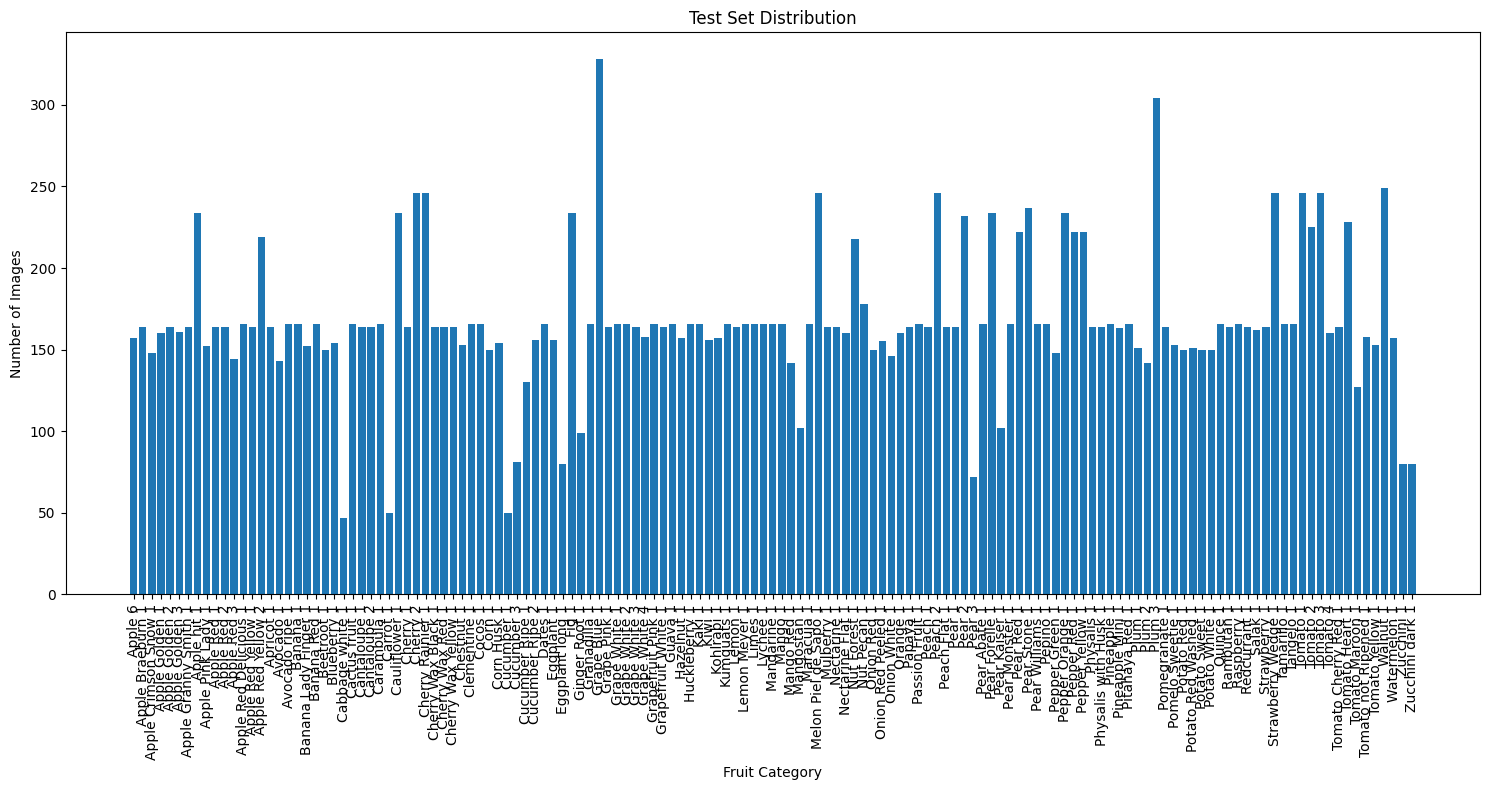

In [8]:
plot_distribution(train_counts, 'Training Set Distribution')
plot_distribution(test_counts, 'Test Set Distribution')

## Noise Reduction

In [9]:
print("Starting noise reduction process...")
total_images = sum(train_counts.values())
processed_images = 0

for fruit in os.listdir(train_path):
    fruit_path = os.path.join(train_path, fruit)
    if os.path.isdir(fruit_path):
        for img_name in os.listdir(fruit_path):
            img_path = os.path.join(fruit_path, img_name)
            img = cv2.imread(img_path)
            denoised_img = apply_noise_reduction(img)
            cv2.imwrite(img_path, denoised_img)
            
            processed_images += 1
            if processed_images % 100 == 0:  # Update every 100 images
                print(f"Processed {processed_images}/{total_images} images. Current fruit: {fruit}")

print("Noise reduction completed.")

Starting noise reduction process...
Processed 100/70491 images. Current fruit: Apple 6
Processed 200/70491 images. Current fruit: Apple 6
Processed 300/70491 images. Current fruit: Apple 6
Processed 400/70491 images. Current fruit: Apple 6
Processed 500/70491 images. Current fruit: Apple Braeburn 1
Processed 600/70491 images. Current fruit: Apple Braeburn 1
Processed 700/70491 images. Current fruit: Apple Braeburn 1
Processed 800/70491 images. Current fruit: Apple Braeburn 1
Processed 900/70491 images. Current fruit: Apple Braeburn 1
Processed 1000/70491 images. Current fruit: Apple Crimson Snow 1
Processed 1100/70491 images. Current fruit: Apple Crimson Snow 1
Processed 1200/70491 images. Current fruit: Apple Crimson Snow 1
Processed 1300/70491 images. Current fruit: Apple Crimson Snow 1
Processed 1400/70491 images. Current fruit: Apple Crimson Snow 1
Processed 1500/70491 images. Current fruit: Apple Golden 1
Processed 1600/70491 images. Current fruit: Apple Golden 1
Processed 1700/70

## Balance the Dataset

In [10]:
print("Starting dataset balancing process...")
min_count = min(train_counts.values())
balance_dataset(train_path, min_count)
print("Dataset balancing completed.")

Starting dataset balancing process...
Dataset balancing completed.


## Verify Balanced Dataset

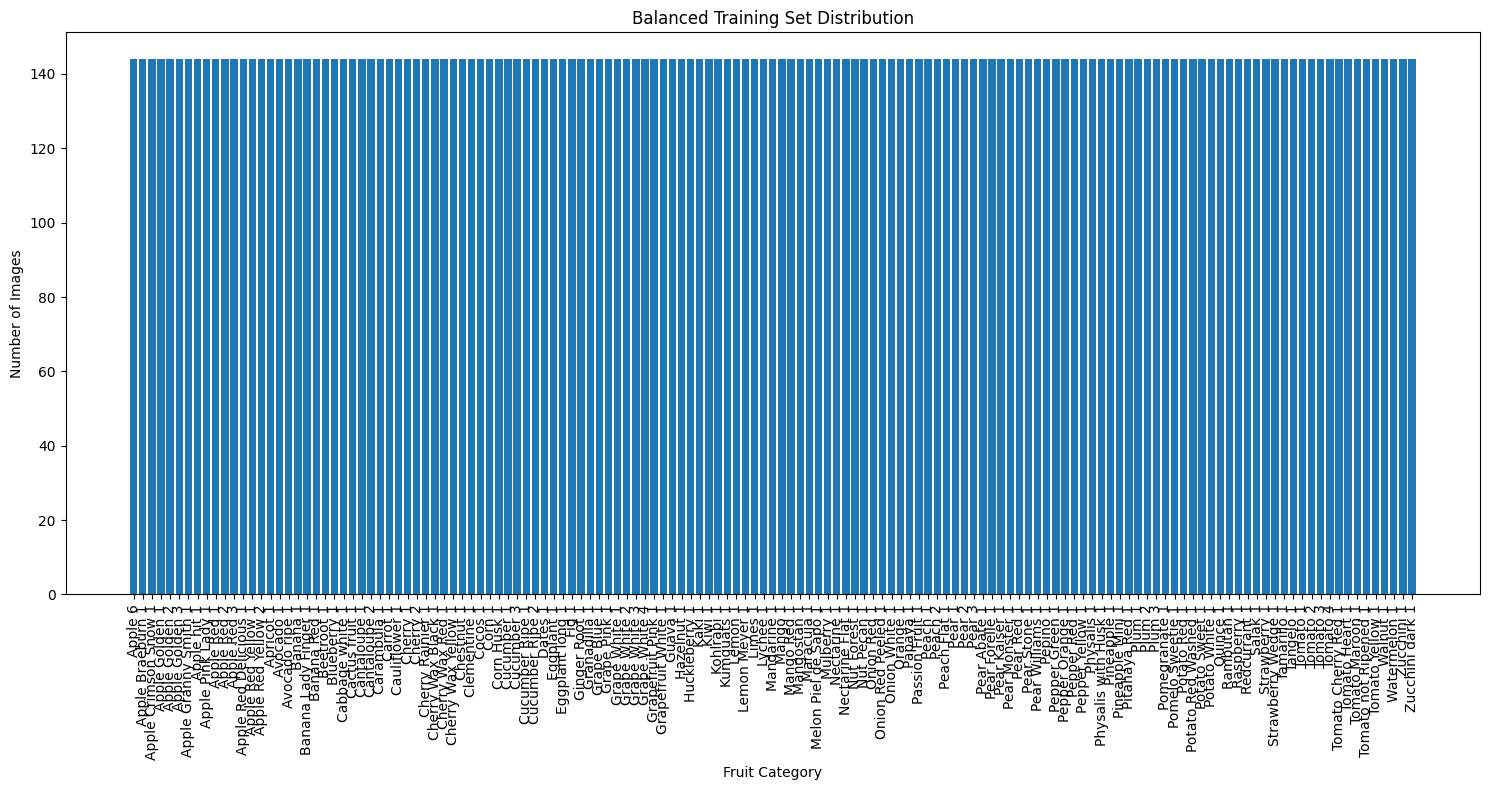

In [11]:
balanced_counts = get_image_counts(train_path)
plot_distribution(balanced_counts, 'Balanced Training Set Distribution')